# Running this notebook

To execute code from a cell, you can either click `Run` at the top, or type `shift+Enter` after clicking a cell. You can either run the entire notebook (`Restart & Run All` from the `Kernel` drop-down), or run each cell individually. 

## Load Python packages

In [1]:
# Ignore warnings.
import warnings
warnings.simplefilter("ignore")

# Scraping.
import requests

# Data manipulation.
import csv
import dateutil
from dateutil import parser
import json
import numpy as np
import pandas as pd
import re

# Plotting.
import matplotlib.pyplot as plt
%matplotlib inline
# for interactive plots
#%matplotlib notebook
import seaborn as sns
sns.set_style('whitegrid')

# ML.
from sklearn import tree
from sklearn.cluster import DBSCAN, KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression

# Plotting: 3D surface plots.
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# Load Scraped Data

In [2]:
# Get it by running:
# $ python3 main.py
df = pd.read_csv('recently_sold_redfin.csv')

# Plots

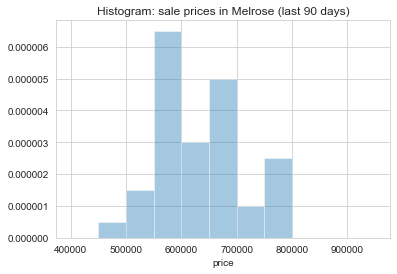

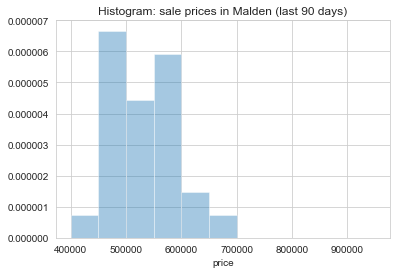

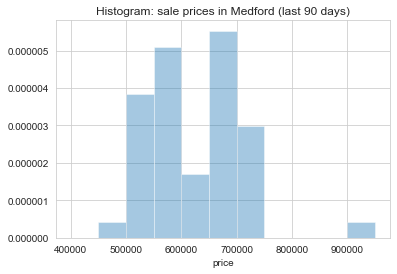

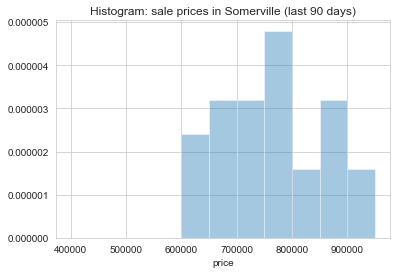

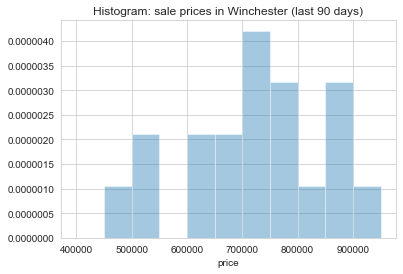

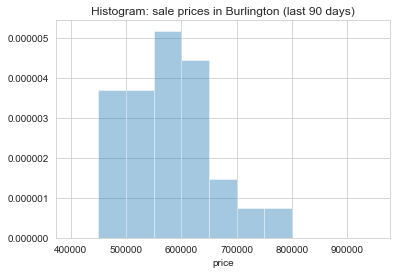

In [3]:
# Plot histogram for each city: sale price.
bins = np.arange(400000, 1000000, 50000)
for city in df['city'].unique():
    sns.distplot(df.loc[df['city'] == city]['price'],
        bins=bins,
        hist_kws={'cumulative': False, 'density': True},
        kde=False).set_title('Histogram: sale prices in ' + city + ' (last 90 days)')
    plt.show()

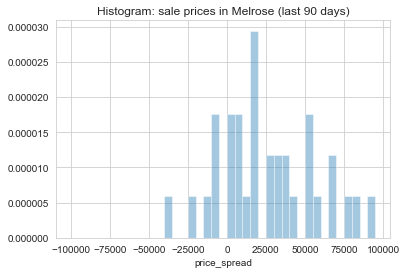

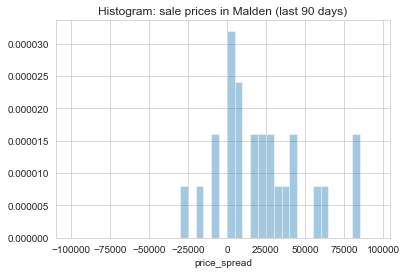

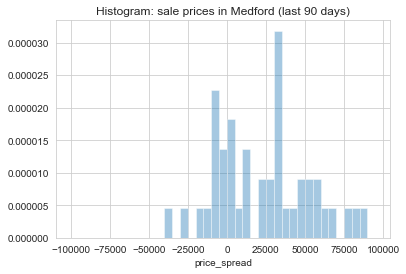

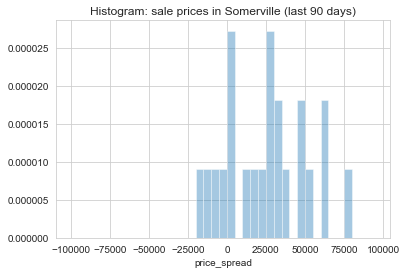

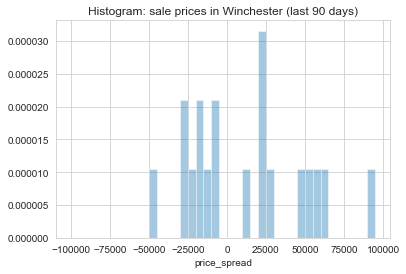

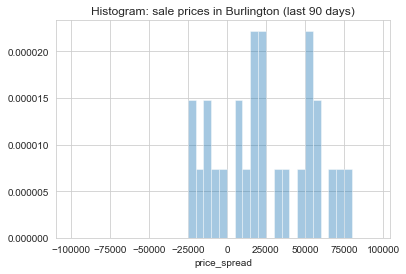

In [4]:
# Plot histogram for each city: price spread.
bins = np.arange(-100000, 100000, 5000)
for city in df['city'].unique():
    sns.distplot(df.loc[df['city'] == city]['price_spread'],
        bins=bins,
        hist_kws={'cumulative': False, 'density': True},
        kde=False).set_title('Histogram: sale prices in ' + city + ' (last 90 days)')
    plt.show()

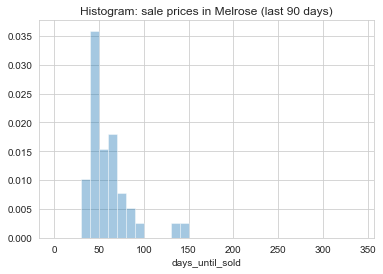

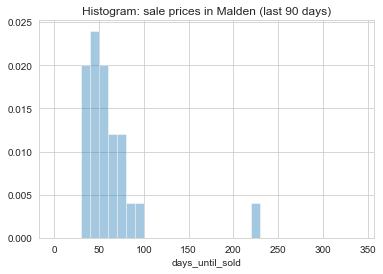

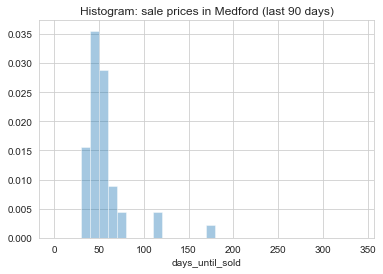

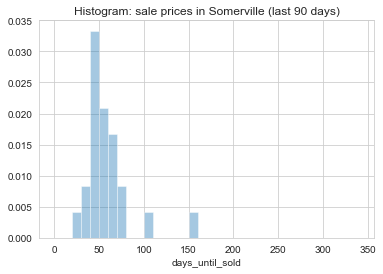

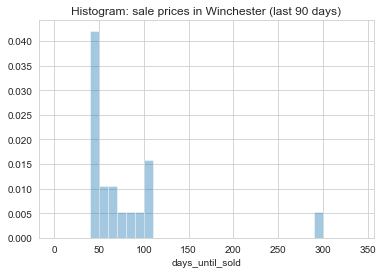

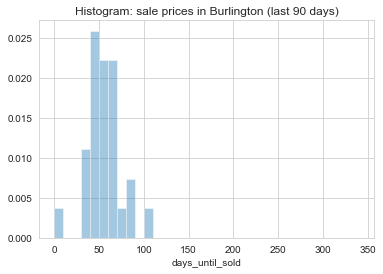

In [5]:
# Plot histogram for each city: days until sold.
bins = np.arange(0, 350, 10)
for city in df['city'].unique():
    sns.distplot(df.loc[df['city'] == city]['days_until_sold'],
        bins=bins,
        hist_kws={'cumulative': False, 'density': True},
        kde=False).set_title('Histogram: sale prices in ' + city + ' (last 90 days)')
    plt.show()

# Get URLs of houses matching specific criteria

In [6]:
# Increase default limit for pandas row display.
pd.set_option('max_colwidth', 120)

print('Houses that went below ask price:')
print(df.loc[(df['price_spread'] < 0) & (df['city'] == 'Melrose')]['url'], '\n')

print('Houses that went exactly at ask price:')
print(df.loc[(df['price_spread'] == 0) & (df['city'] == 'Melrose')]['url'], '\n')

print('Houses that went above ask price:')
print(df.loc[(df['price_spread'] > 0) & (df['city'] == 'Melrose')]['url'], '\n')

Houses that went below ask price:
1     https://redfin.com/MA/Melrose/62-Circuit-St-02176/unit-2/home/172392225
8             https://redfin.com/MA/Melrose/20-Mt-Zion-Rd-02176/home/11790736
20              https://redfin.com/MA/Melrose/75-Maple-St-02176/home/11791463
31              https://redfin.com/MA/Melrose/64-York-Ter-02176/home/11786695
32          https://redfin.com/MA/Melrose/19-Arlington-St-02176/home/11782113
37          https://redfin.com/MA/Melrose/101-Sycamore-Rd-02176/home/11785083
Name: url, dtype: object 

Houses that went exactly at ask price:
23     https://redfin.com/MA/Melrose/174-Howard-St-02176/home/11791012
27        https://redfin.com/MA/Melrose/19-Cass-St-02176/home/11781283
30    https://redfin.com/MA/Melrose/36-E-Foster-St-02176/home/11780166
Name: url, dtype: object 

Houses that went above ask price:
0                https://redfin.com/MA/Melrose/219-Beech-Ave-02176/home/11784041
3                 https://redfin.com/MA/Melrose/1094-Main-St-02176/home/11789